In [1]:
import torch
import pandas as pd

import my_dataset
import train
import model

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print('using device:', device)

using device: cpu


In [3]:
DATASET_PATH = 'dataset/'

f0_channel_1, f0_channel_2, f0_channel_3 = my_dataset.load_data(DATASET_PATH + '0.txt')
f01_channel_1, f01_channel_2, f01_channel_3 = my_dataset.load_data(DATASET_PATH + '0_1.txt')
f02_channel_1, f02_channel_2, f02_channel_3 = my_dataset.load_data(DATASET_PATH + '0_2.txt')

f1_channel_1, f1_channel_2, f1_channel_3 = my_dataset.load_data(DATASET_PATH + '1.txt')
f11_channel_1, f11_channel_2, f11_channel_3 = my_dataset.load_data(DATASET_PATH + '1_1.txt')
f12_channel_1, f12_channel_2, f12_channel_3 = my_dataset.load_data(DATASET_PATH + '1_2.txt')

f2_channel_1, f2_channel_2, f2_channel_3 = my_dataset.load_data(DATASET_PATH + '2.txt')
f21_channel_1, f21_channel_2, f21_channel_3 = my_dataset.load_data(DATASET_PATH + '2_1.txt')
f22_channel_1, f22_channel_2, f22_channel_3 = my_dataset.load_data(DATASET_PATH + '2_2.txt')

f3_channel_1, f3_channel_2, f3_channel_3 = my_dataset.load_data(DATASET_PATH + '4.txt')
f31_channel_1, f31_channel_2, f31_channel_3 = my_dataset.load_data(DATASET_PATH + '4_1.txt')
f32_channel_1, f32_channel_2, f32_channel_3 = my_dataset.load_data(DATASET_PATH + '4_2.txt')

f4_channel_1, f4_channel_2, f4_channel_3 = my_dataset.load_data(DATASET_PATH + '6.txt')
f41_channel_1, f41_channel_2, f41_channel_3 = my_dataset.load_data(DATASET_PATH + '6_1.txt')
f42_channel_1, f42_channel_2, f42_channel_3 = my_dataset.load_data(DATASET_PATH + '6_2.txt')

f5_channel_1, f5_channel_2, f5_channel_3 = my_dataset.load_data(DATASET_PATH + '10.txt')
f51_channel_1, f51_channel_2, f51_channel_3 = my_dataset.load_data(DATASET_PATH + '10_1.txt')
f52_channel_1, f52_channel_2, f52_channel_3 = my_dataset.load_data(DATASET_PATH + '10_2.txt')

f6_channel_1, f6_channel_2, f6_channel_3 = my_dataset.load_data(DATASET_PATH + '15.txt')
f61_channel_1, f61_channel_2, f61_channel_3 = my_dataset.load_data(DATASET_PATH + '15_1.txt')
f62_channel_1, f62_channel_2, f62_channel_3 = my_dataset.load_data(DATASET_PATH + '15_2.txt')

f7_channel_1, f7_channel_2, f7_channel_3 = my_dataset.load_data(DATASET_PATH + 'фасоль.txt')
f71_channel_1, f71_channel_2, f71_channel_3 = my_dataset.load_data(DATASET_PATH + 'фасоль_1.txt')
f72_channel_1, f72_channel_2, f72_channel_3 = my_dataset.load_data(DATASET_PATH + 'фасоль_2.txt')
f73_channel_1, f73_channel_2, f73_channel_3 = my_dataset.load_data(DATASET_PATH + 'фасоль_3.txt')

0.txt - 0_2.txt


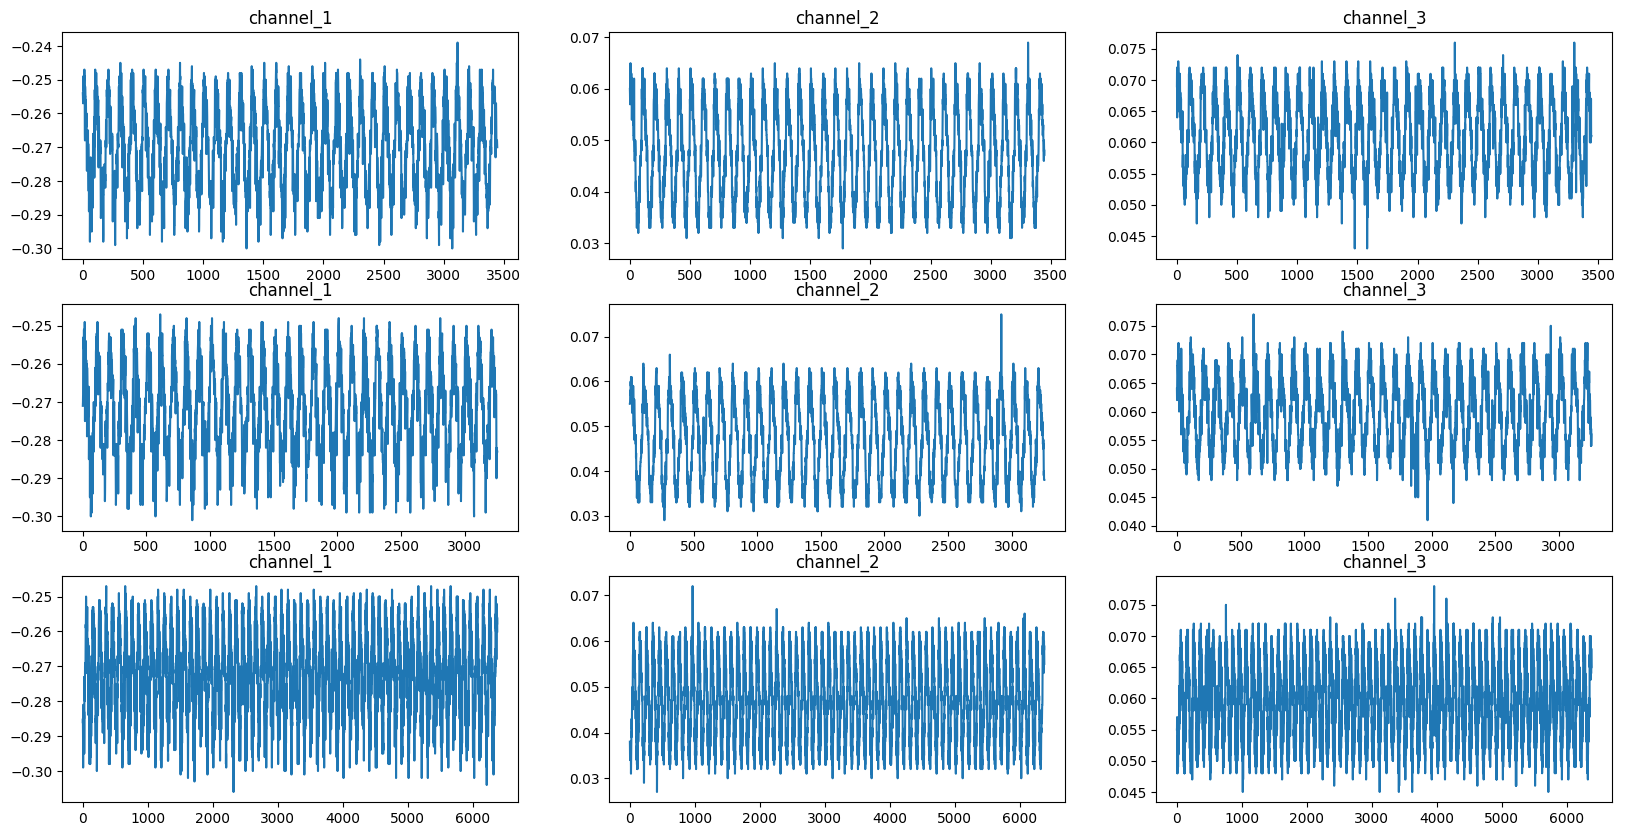

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
      
plt.subplot(3, 3, 1)
plt.title("channel_1")
plt.plot(f0_channel_1)

plt.subplot(3, 3, 2)
plt.title("channel_2")
plt.plot(f0_channel_2)

plt.subplot(3, 3, 3)
plt.title("channel_3")
plt.plot(f0_channel_3)

plt.subplot(3, 3, 4)
plt.title("channel_1")
plt.plot(f01_channel_1)

plt.subplot(3, 3, 5)
plt.title("channel_2")
plt.plot(f01_channel_2)

plt.subplot(3, 3, 6)
plt.title("channel_3")
plt.plot(f01_channel_3)

plt.subplot(3, 3, 7)
plt.title("channel_1")
plt.plot(f02_channel_1)

plt.subplot(3, 3, 8)
plt.title("channel_2")
plt.plot(f02_channel_2)

plt.subplot(3, 3, 9)
plt.title("channel_3")
plt.plot(f02_channel_3)



print('0.txt - 0_2.txt')
plt.show()

In [5]:
len(f0_channel_1)

3446

/home/host/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/host/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


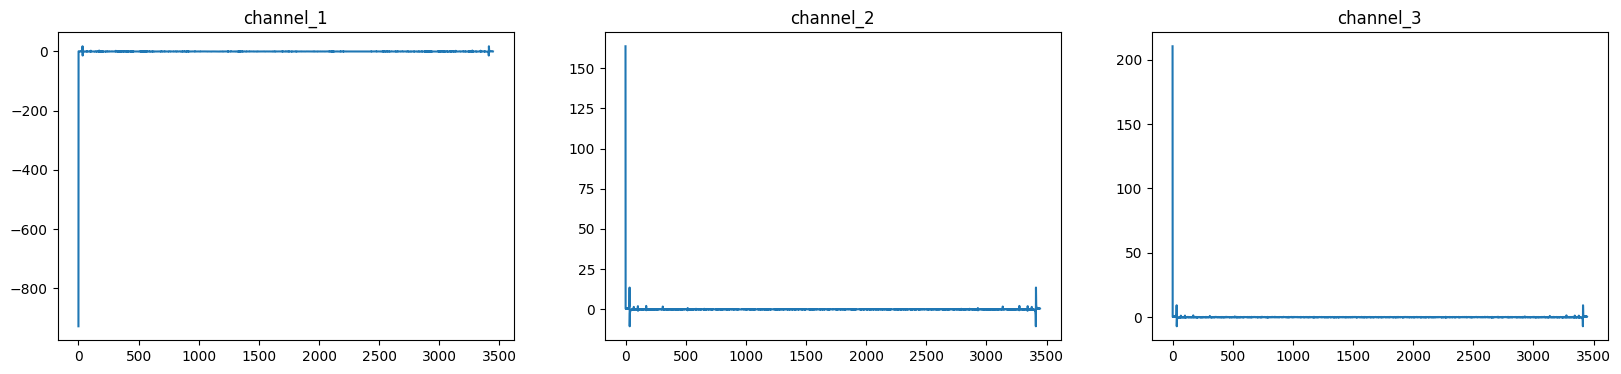

In [6]:
import numpy as np
import scipy

sf0_channel_1 = scipy.fft.fft(f0_channel_1)
sf0_channel_2 = scipy.fft.fft(f0_channel_2)
sf0_channel_3 = scipy.fft.fft(f0_channel_3)

fig = plt.figure(figsize=(20, 4))
      
plt.subplot(1, 3, 1)
plt.title("channel_1")
plt.plot(sf0_channel_1)

plt.subplot(1, 3, 2)
plt.title("channel_2")
plt.plot(sf0_channel_2)

plt.subplot(1, 3, 3)
plt.title("channel_3")
plt.plot(sf0_channel_3)

plt.show()

In [7]:
len(sf0_channel_1)

3446

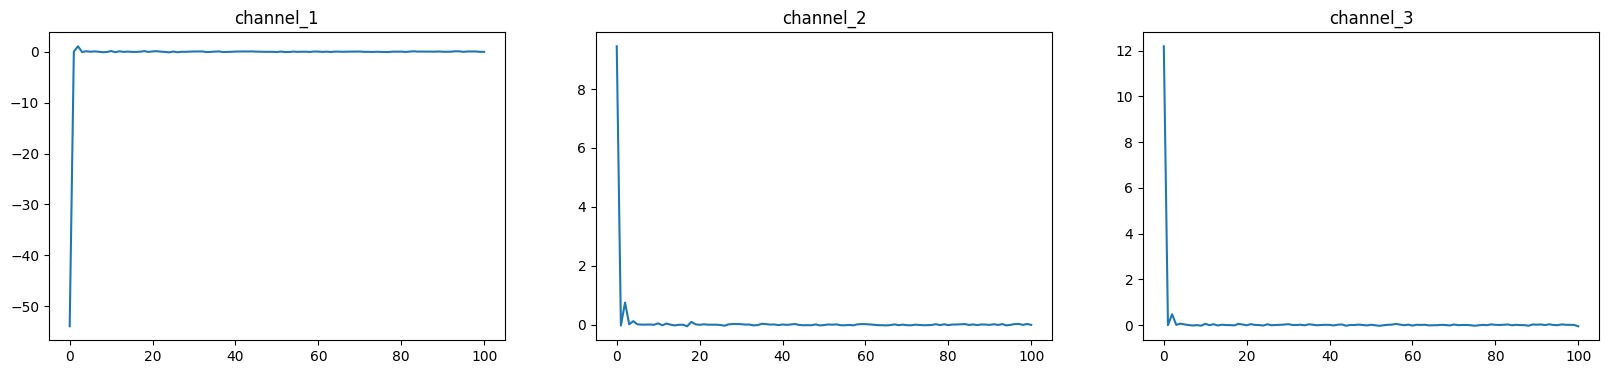

In [8]:
import numpy as np
import scipy

sf0_channel_1 = scipy.fft.rfft(f0_channel_1[400:600])
sf0_channel_2 = scipy.fft.rfft(f0_channel_2[400:600])
sf0_channel_3 = scipy.fft.rfft(f0_channel_3[400:600])

fig = plt.figure(figsize=(20, 4))
      
plt.subplot(1, 3, 1)
plt.title("channel_1")
plt.plot(sf0_channel_1)

plt.subplot(1, 3, 2)
plt.title("channel_2")
plt.plot(sf0_channel_2)

plt.subplot(1, 3, 3)
plt.title("channel_3")
plt.plot(sf0_channel_3)

plt.show()

In [9]:
sf0_channel_1

array([-5.39190000e+01+0.00000000e+00j,  1.04888225e-02+2.15815447e-02j,
        1.06515125e+00-1.27077137e+00j, -6.59091445e-02-1.35290860e-02j,
        9.09795413e-02-5.73728461e-02j, -6.99680309e-03+5.93839874e-02j,
        5.83874057e-02-2.31799394e-01j, -1.08459049e-02+2.73936533e-02j,
       -9.73718933e-02-9.25671626e-02j, -4.56774073e-02+5.95833675e-02j,
        1.24576401e-01-1.22195570e-01j, -9.43588568e-02-2.22132352e-02j,
        7.69710818e-02+7.05826097e-02j, -3.33697271e-02+2.36187861e-02j,
        1.86081631e-02-2.22356105e-02j, -3.05756729e-02+2.19261598e-02j,
       -4.60041931e-02+1.76307625e-02j, -2.54242645e-04-5.82581334e-02j,
        1.13065209e-01+5.12353734e-02j, -4.27793018e-02+2.04423089e-02j,
        5.91696968e-02+1.95591906e-01j,  9.92860094e-02-1.06104527e-01j,
        8.94583299e-03+4.49481236e-02j, -3.85486232e-02+8.85761350e-02j,
       -1.29475985e-01+2.47349244e-02j,  4.00624458e-02-9.49747468e-04j,
       -1.09168512e-01-1.45025470e-02j, -1.27341337

6.txt - 6_2.txt


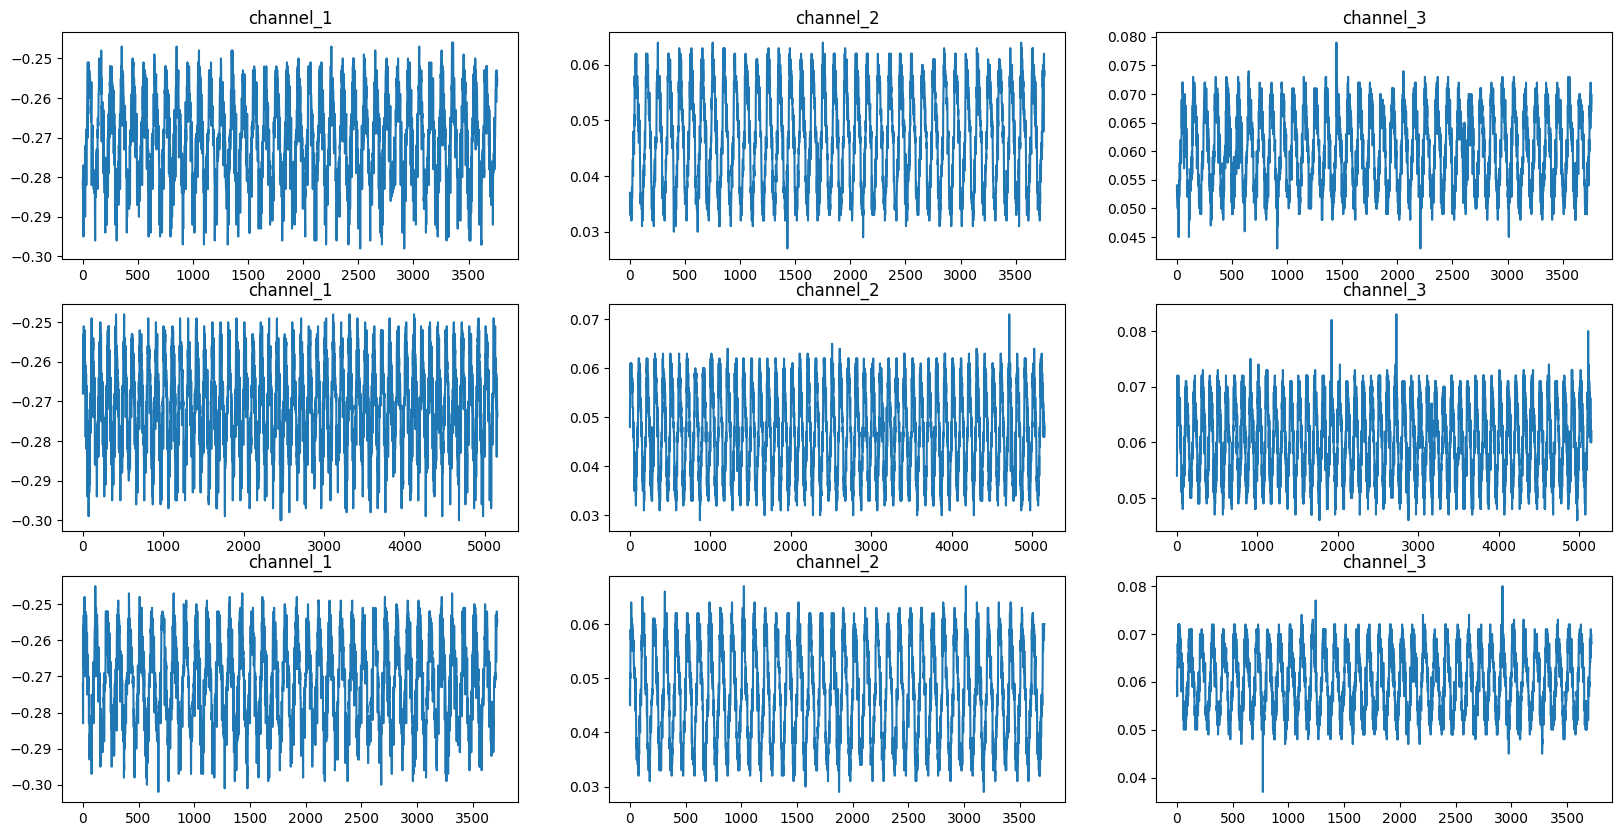

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
      
plt.subplot(3, 3, 1)
plt.title("channel_1")
plt.plot(f4_channel_1)

plt.subplot(3, 3, 2)
plt.title("channel_2")
plt.plot(f4_channel_2)

plt.subplot(3, 3, 3)
plt.title("channel_3")
plt.plot(f4_channel_3)

plt.subplot(3, 3, 4)
plt.title("channel_1")
plt.plot(f41_channel_1)

plt.subplot(3, 3, 5)
plt.title("channel_2")
plt.plot(f41_channel_2)

plt.subplot(3, 3, 6)
plt.title("channel_3")
plt.plot(f41_channel_3)

plt.subplot(3, 3, 7)
plt.title("channel_1")
plt.plot(f42_channel_1)

plt.subplot(3, 3, 8)
plt.title("channel_2")
plt.plot(f42_channel_2)

plt.subplot(3, 3, 9)
plt.title("channel_3")
plt.plot(f42_channel_3)



print('6.txt - 6_2.txt')
plt.show()

фасоль.txt - фасоль_3.txt


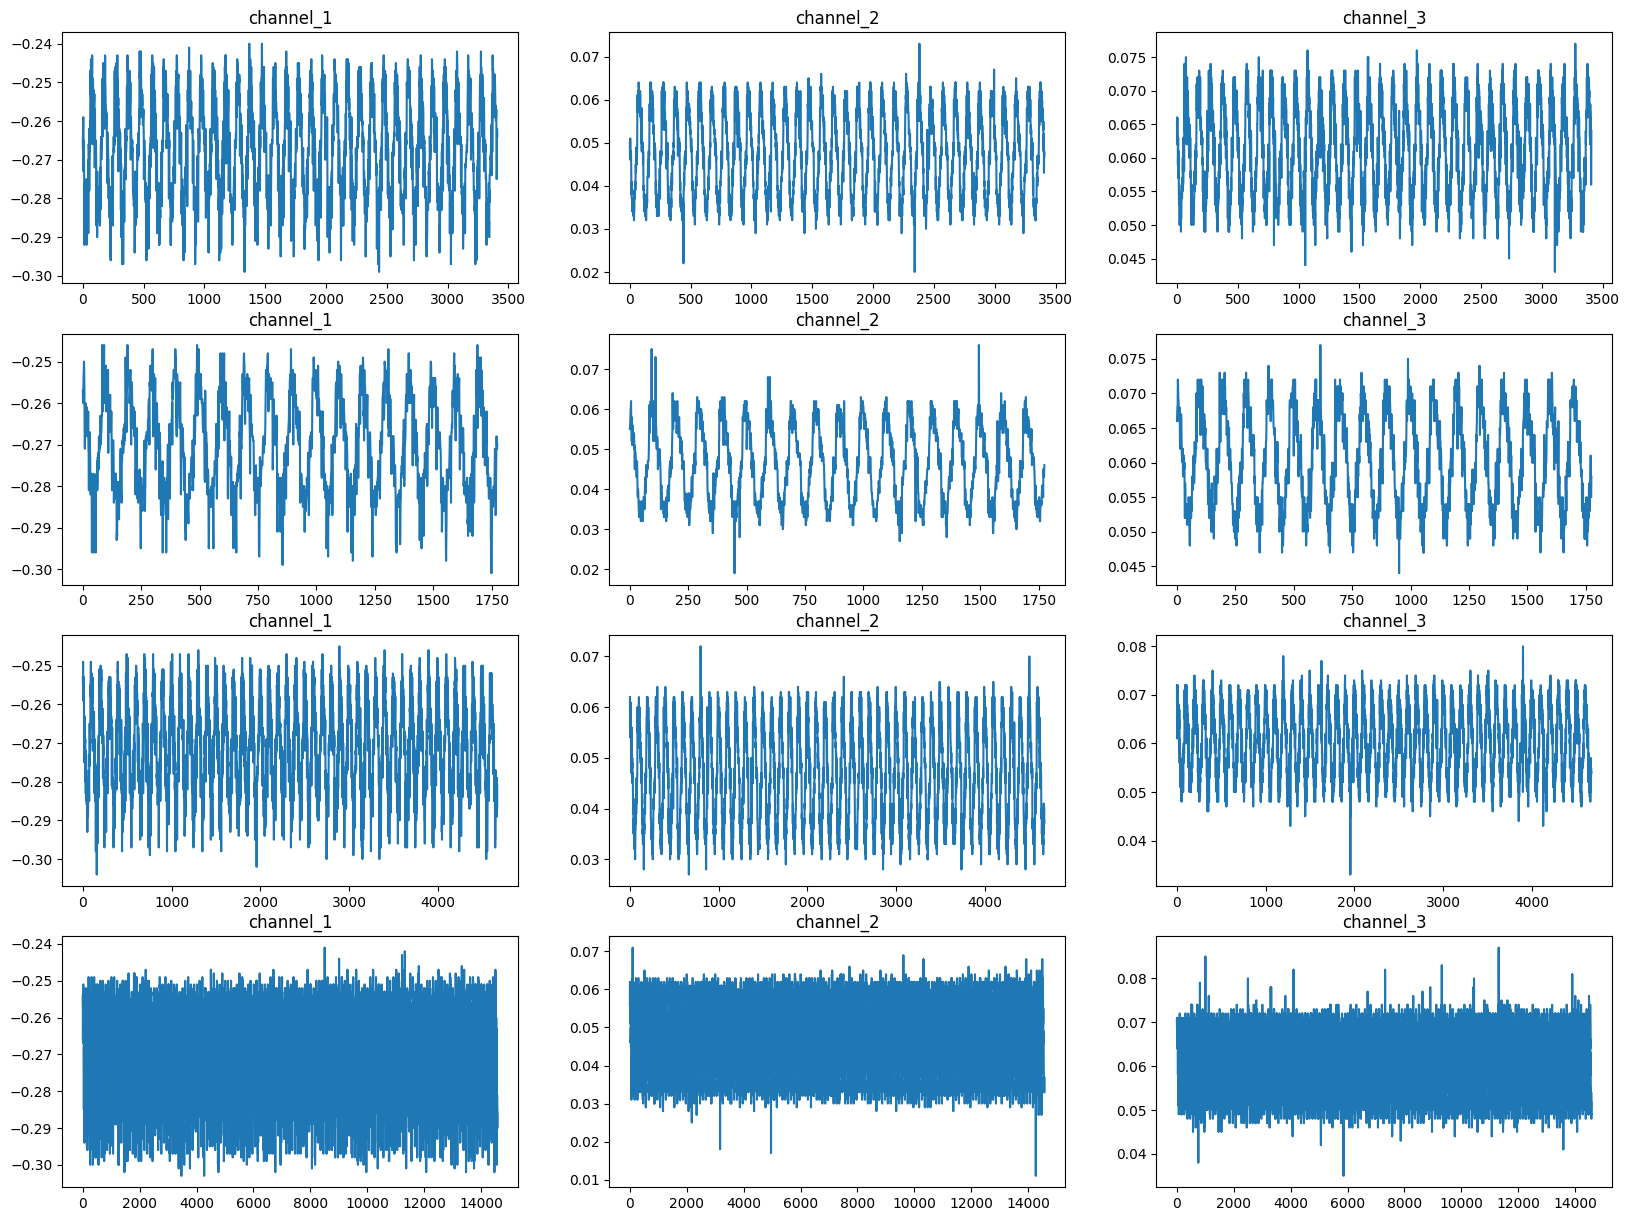

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 15))
      
plt.subplot(4, 3, 1)
plt.title("channel_1")
plt.plot(f7_channel_1)

plt.subplot(4, 3, 2)
plt.title("channel_2")
plt.plot(f7_channel_2)

plt.subplot(4, 3, 3)
plt.title("channel_3")
plt.plot(f7_channel_3)

plt.subplot(4, 3, 4)
plt.title("channel_1")
plt.plot(f71_channel_1)

plt.subplot(4, 3, 5)
plt.title("channel_2")
plt.plot(f71_channel_2)

plt.subplot(4, 3, 6)
plt.title("channel_3")
plt.plot(f71_channel_3)

plt.subplot(4, 3, 7)
plt.title("channel_1")
plt.plot(f72_channel_1)

plt.subplot(4, 3, 8)
plt.title("channel_2")
plt.plot(f72_channel_2)

plt.subplot(4, 3, 9)
plt.title("channel_3")
plt.plot(f72_channel_3)

plt.subplot(4, 3, 10)
plt.title("channel_1")
plt.plot(f73_channel_1)

plt.subplot(4, 3, 11)
plt.title("channel_2")
plt.plot(f73_channel_2)

plt.subplot(4, 3, 12)
plt.title("channel_3")
plt.plot(f73_channel_3)



print('фасоль.txt - фасоль_3.txt')
plt.show()

In [12]:
from my_dataset import split_data_to_dataframe
COUNT_IN_CHANNEL = 100
NUM_CLASSES = 8

f0_norm_dataset, f0_diff_dataset = split_data_to_dataframe(f0_channel_1, f0_channel_2, f0_channel_3,
                                                           label=0, count_of_data_in_channel=COUNT_IN_CHANNEL)
f01_norm_dataset, f01_diff_dataset = split_data_to_dataframe(f01_channel_1, f01_channel_2, f01_channel_3,
                                                           label=0, count_of_data_in_channel=COUNT_IN_CHANNEL)
f02_norm_dataset, f02_diff_dataset = split_data_to_dataframe(f02_channel_1, f02_channel_2, f02_channel_3,
                                                           label=0, count_of_data_in_channel=COUNT_IN_CHANNEL)

f1_norm_dataset, f1_diff_dataset = split_data_to_dataframe(f1_channel_1, f1_channel_2, f1_channel_3,
                                                           label=1, count_of_data_in_channel=COUNT_IN_CHANNEL)
f11_norm_dataset, f11_diff_dataset = split_data_to_dataframe(f11_channel_1, f11_channel_2, f11_channel_3,
                                                           label=1, count_of_data_in_channel=COUNT_IN_CHANNEL)
f12_norm_dataset, f12_diff_dataset = split_data_to_dataframe(f12_channel_1, f12_channel_2, f12_channel_3,
                                                           label=1, count_of_data_in_channel=COUNT_IN_CHANNEL)

f2_norm_dataset, f2_diff_dataset = split_data_to_dataframe(f2_channel_1, f2_channel_2, f2_channel_3,
                                                           label=2, count_of_data_in_channel=COUNT_IN_CHANNEL)
f21_norm_dataset, f21_diff_dataset = split_data_to_dataframe(f21_channel_1, f21_channel_2, f21_channel_3,
                                                           label=2, count_of_data_in_channel=COUNT_IN_CHANNEL)
f22_norm_dataset, f22_diff_dataset = split_data_to_dataframe(f22_channel_1, f22_channel_2, f22_channel_3,
                                                           label=2, count_of_data_in_channel=COUNT_IN_CHANNEL)

f3_norm_dataset, f3_diff_dataset = split_data_to_dataframe(f3_channel_1, f3_channel_2, f3_channel_3,
                                                           label=3, count_of_data_in_channel=COUNT_IN_CHANNEL)
f31_norm_dataset, f31_diff_dataset = split_data_to_dataframe(f31_channel_1, f31_channel_2, f31_channel_3,
                                                           label=3, count_of_data_in_channel=COUNT_IN_CHANNEL)
f32_norm_dataset, f32_diff_dataset = split_data_to_dataframe(f32_channel_1, f32_channel_2, f32_channel_3,
                                                           label=3, count_of_data_in_channel=COUNT_IN_CHANNEL)

f4_norm_dataset, f4_diff_dataset = split_data_to_dataframe(f4_channel_1, f4_channel_2, f4_channel_3,
                                                           label=4, count_of_data_in_channel=COUNT_IN_CHANNEL)
f41_norm_dataset, f41_diff_dataset = split_data_to_dataframe(f41_channel_1, f41_channel_2, f41_channel_3,
                                                           label=4, count_of_data_in_channel=COUNT_IN_CHANNEL)
f42_norm_dataset, f42_diff_dataset = split_data_to_dataframe(f42_channel_1, f42_channel_2, f42_channel_3,
                                                           label=4, count_of_data_in_channel=COUNT_IN_CHANNEL)

f5_norm_dataset, f5_diff_dataset = split_data_to_dataframe(f5_channel_1, f5_channel_2, f5_channel_3,
                                                           label=5, count_of_data_in_channel=COUNT_IN_CHANNEL)
f51_norm_dataset, f51_diff_dataset = split_data_to_dataframe(f51_channel_1, f51_channel_2, f51_channel_3,
                                                           label=5, count_of_data_in_channel=COUNT_IN_CHANNEL)
f52_norm_dataset, f52_diff_dataset = split_data_to_dataframe(f52_channel_1, f52_channel_2, f52_channel_3,
                                                           label=5, count_of_data_in_channel=COUNT_IN_CHANNEL)

f6_norm_dataset, f6_diff_dataset = split_data_to_dataframe(f6_channel_1, f6_channel_2, f6_channel_3,
                                                           label=6, count_of_data_in_channel=COUNT_IN_CHANNEL)
f61_norm_dataset, f61_diff_dataset = split_data_to_dataframe(f61_channel_1, f61_channel_2, f61_channel_3,
                                                           label=6, count_of_data_in_channel=COUNT_IN_CHANNEL)
f62_norm_dataset, f62_diff_dataset = split_data_to_dataframe(f62_channel_1, f62_channel_2, f62_channel_3,
                                                           label=6, count_of_data_in_channel=COUNT_IN_CHANNEL)

f7_norm_dataset, f7_diff_dataset = split_data_to_dataframe(f7_channel_1, f7_channel_2, f7_channel_3,
                                                           label=7, count_of_data_in_channel=COUNT_IN_CHANNEL)
f71_norm_dataset, f71_diff_dataset = split_data_to_dataframe(f71_channel_1, f71_channel_2, f71_channel_3,
                                                           label=7, count_of_data_in_channel=COUNT_IN_CHANNEL)
f72_norm_dataset, f72_diff_dataset = split_data_to_dataframe(f72_channel_1, f72_channel_2, f72_channel_3,
                                                           label=7, count_of_data_in_channel=COUNT_IN_CHANNEL)
f73_norm_dataset, f73_diff_dataset = split_data_to_dataframe(f73_channel_1, f73_channel_2, f73_channel_3,
                                                           label=7, count_of_data_in_channel=COUNT_IN_CHANNEL)


In [13]:
# norm
final_dataset_norm = pd.concat([f0_norm_dataset, f01_norm_dataset], ignore_index=True)
final_dataset_norm = pd.concat([final_dataset_norm, f02_norm_dataset], ignore_index=True)

final_dataset_norm = pd.concat([final_dataset_norm, f1_norm_dataset], ignore_index=True)
final_dataset_norm = pd.concat([final_dataset_norm, f11_norm_dataset], ignore_index=True)
final_dataset_norm = pd.concat([final_dataset_norm, f12_norm_dataset], ignore_index=True)

final_dataset_norm = pd.concat([final_dataset_norm, f2_norm_dataset], ignore_index=True)
final_dataset_norm = pd.concat([final_dataset_norm, f21_norm_dataset], ignore_index=True)
final_dataset_norm = pd.concat([final_dataset_norm, f22_norm_dataset], ignore_index=True)

final_dataset_norm = pd.concat([final_dataset_norm, f3_norm_dataset], ignore_index=True)
final_dataset_norm = pd.concat([final_dataset_norm, f31_norm_dataset], ignore_index=True)
final_dataset_norm = pd.concat([final_dataset_norm, f32_norm_dataset], ignore_index=True)

final_dataset_norm = pd.concat([final_dataset_norm, f4_norm_dataset], ignore_index=True)
final_dataset_norm = pd.concat([final_dataset_norm, f41_norm_dataset], ignore_index=True)
final_dataset_norm = pd.concat([final_dataset_norm, f42_norm_dataset], ignore_index=True)

final_dataset_norm = pd.concat([final_dataset_norm, f5_norm_dataset], ignore_index=True)
final_dataset_norm = pd.concat([final_dataset_norm, f51_norm_dataset], ignore_index=True)
final_dataset_norm = pd.concat([final_dataset_norm, f52_norm_dataset], ignore_index=True)

final_dataset_norm = pd.concat([final_dataset_norm, f6_norm_dataset], ignore_index=True)
final_dataset_norm = pd.concat([final_dataset_norm, f61_norm_dataset], ignore_index=True)
final_dataset_norm = pd.concat([final_dataset_norm, f62_norm_dataset], ignore_index=True)

final_dataset_norm = pd.concat([final_dataset_norm, f7_norm_dataset], ignore_index=True)
final_dataset_norm = pd.concat([final_dataset_norm, f71_norm_dataset], ignore_index=True)
final_dataset_norm = pd.concat([final_dataset_norm, f72_norm_dataset], ignore_index=True)
final_dataset_norm = pd.concat([final_dataset_norm, f73_norm_dataset], ignore_index=True)


# diff
final_dataset_diff = pd.concat([f0_diff_dataset, f01_diff_dataset], ignore_index=True)
final_dataset_diff = pd.concat([final_dataset_diff, f02_diff_dataset], ignore_index=True)

final_dataset_diff = pd.concat([final_dataset_diff, f1_diff_dataset], ignore_index=True)
final_dataset_diff = pd.concat([final_dataset_diff, f11_diff_dataset], ignore_index=True)
final_dataset_diff = pd.concat([final_dataset_diff, f12_diff_dataset], ignore_index=True)

final_dataset_diff = pd.concat([final_dataset_diff, f2_diff_dataset], ignore_index=True)
final_dataset_diff = pd.concat([final_dataset_diff, f21_diff_dataset], ignore_index=True)
final_dataset_diff = pd.concat([final_dataset_diff, f22_diff_dataset], ignore_index=True)

final_dataset_diff = pd.concat([final_dataset_diff, f3_diff_dataset], ignore_index=True)
final_dataset_diff = pd.concat([final_dataset_diff, f31_diff_dataset], ignore_index=True)
final_dataset_diff = pd.concat([final_dataset_diff, f32_diff_dataset], ignore_index=True)

final_dataset_diff = pd.concat([final_dataset_diff, f4_diff_dataset], ignore_index=True)
final_dataset_diff = pd.concat([final_dataset_diff, f41_diff_dataset], ignore_index=True)
final_dataset_diff = pd.concat([final_dataset_diff, f42_diff_dataset], ignore_index=True)

final_dataset_diff = pd.concat([final_dataset_diff, f5_diff_dataset], ignore_index=True)
final_dataset_diff = pd.concat([final_dataset_diff, f51_diff_dataset], ignore_index=True)
final_dataset_diff = pd.concat([final_dataset_diff, f52_diff_dataset], ignore_index=True)

final_dataset_diff = pd.concat([final_dataset_diff, f6_diff_dataset], ignore_index=True)
final_dataset_diff = pd.concat([final_dataset_diff, f61_diff_dataset], ignore_index=True)
final_dataset_diff = pd.concat([final_dataset_diff, f62_diff_dataset], ignore_index=True)

final_dataset_diff = pd.concat([final_dataset_diff, f7_diff_dataset], ignore_index=True)
final_dataset_diff = pd.concat([final_dataset_diff, f71_diff_dataset], ignore_index=True)
final_dataset_diff = pd.concat([final_dataset_diff, f72_diff_dataset], ignore_index=True)
final_dataset_diff = pd.concat([final_dataset_diff, f73_diff_dataset], ignore_index=True)

In [14]:
final_dataset_norm

,data,label
0,"[-0.254, -0.255, -0.257, -0.25, -0.249, -0.251...",0
1,"[-0.255, -0.256, -0.252, -0.247, -0.265, -0.25...",0
2,"[-0.255, -0.255, -0.253, -0.253, -0.25, -0.25,...",0
3,"[-0.252, -0.258, -0.265, -0.263, -0.249, -0.25...",0
4,"[-0.258, -0.269, -0.256, -0.262, -0.248, -0.25...",0
...,...,...
973,"[-0.255, -0.258, -0.259, -0.253, -0.259, -0.25...",7
974,"[-0.257, -0.262, -0.258, -0.255, -0.256, -0.25...",7
975,"[-0.257, -0.259, -0.256, -0.26, -0.254, -0.255...",7
976,"[-0.255, -0.252, -0.253, -0.26, -0.268, -0.255...",7


In [15]:
final_dataset_diff

,data,label
0,"[-0.314, -0.314, -0.314, -0.31, -0.311, -0.316...",0
1,"[-0.313, -0.314, -0.31, -0.309, -0.324, -0.315...",0
2,"[-0.313, -0.315, -0.311, -0.316, -0.31, -0.312...",0
3,"[-0.309, -0.314, -0.318, -0.32, -0.308, -0.312...",0
4,"[-0.317, -0.325, -0.318, -0.317, -0.31, -0.313...",0
...,...,...
973,"[-0.313, -0.316, -0.318, -0.311, -0.321, -0.31...",7
974,"[-0.316, -0.32, -0.318, -0.314, -0.318, -0.318...",7
975,"[-0.314, -0.317, -0.312, -0.316, -0.316, -0.31...",7
976,"[-0.314, -0.307, -0.309, -0.315, -0.326, -0.31...",7


In [16]:
train_dataset_norm, valid_dataset_norm, test_dataset_norm = my_dataset.train_val_test_split(final_dataset_norm)
train_dataset_diff, valid_dataset_diff, test_dataset_diff = my_dataset.train_val_test_split(final_dataset_diff)

In [17]:
train_dataset_norm

,data,label
950,"[-0.254, -0.258, -0.257, -0.255, -0.252, -0.25...",7
251,"[-0.274, -0.277, -0.275, -0.273, -0.272, -0.27...",2
775,"[-0.253, -0.259, -0.257, -0.253, -0.253, -0.25...",7
182,"[-0.289, -0.288, -0.291, -0.287, -0.288, -0.28...",1
473,"[-0.274, -0.271, -0.266, -0.264, -0.264, -0.25...",4
...,...,...
391,"[-0.268, -0.266, -0.261, -0.259, -0.256, -0.25...",4
218,"[-0.28, -0.287, -0.289, -0.283, -0.281, -0.273...",2
540,"[-0.252, -0.253, -0.256, -0.253, -0.252, -0.25...",5
45,"[-0.26, -0.251, -0.264, -0.259, -0.256, -0.256...",0


In [18]:
train_dataset_norm = train_dataset_norm.reset_index(drop=True)
valid_dataset_norm = valid_dataset_norm.reset_index(drop=True)
test_dataset_norm = test_dataset_norm.reset_index(drop=True)

train_dataset_diff = train_dataset_norm.reset_index(drop=True)
valid_dataset_diff = valid_dataset_norm.reset_index(drop=True)
test_dataset_diff = test_dataset_norm.reset_index(drop=True)

In [19]:
from custom_dataset import CustomDataset

train_norm = CustomDataset(train_dataset_norm)
valid_norm = CustomDataset(valid_dataset_norm)
test_norm = CustomDataset(test_dataset_norm)

train_diff = CustomDataset(train_dataset_diff)
valid_diff = CustomDataset(valid_dataset_diff)
test_diff = CustomDataset(test_dataset_diff)

In [20]:
from torch.utils.data import DataLoader

batch_size = 64 # размер батча
train_norm = DataLoader(train_norm, batch_size=batch_size, shuffle=True)
valid_norm = DataLoader(valid_norm, batch_size=batch_size, shuffle=False)
test_norm = DataLoader(test_norm, batch_size=batch_size, shuffle=False)

train_diff = DataLoader(train_diff, batch_size=batch_size, shuffle=True)
valid_diff = DataLoader(valid_diff, batch_size=batch_size, shuffle=False)
test_diff = DataLoader(test_diff, batch_size=batch_size, shuffle=False)

In [21]:
print(len(train_norm))
for (data, label) in train_norm:
    print(data.shape)
    print(label.shape)
    break

13
torch.Size([64, 1, 300])
torch.Size([64, 1])


In [22]:
import model
from train import train_model
# COUNT_IN_CHANNEL = 100
net_norm = model.CNN(COUNT_IN_CHANNEL, NUM_CLASSES).to(device)

loss_history_norm, best_model_norm = train_model(train_norm, valid_norm, net_norm, epochs=2000, device=device)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch [0/2000], loss = 2.0746 acc_val = 0.1327
Epoch [1/2000], loss = 2.0634 acc_val = 0.1327
Epoch [2/2000], loss = 2.0563 acc_val = 0.1327
Epoch [3/2000], loss = 2.0514 acc_val = 0.1327
Epoch [4/2000], loss = 2.0424 acc_val = 0.1327
Epoch [5/2000], loss = 2.0367 acc_val = 0.2449
Epoch [6/2000], loss = 2.0327 acc_val = 0.2449
Epoch [7/2000], loss = 2.0244 acc_val = 0.2449
Epoch [8/2000], loss = 2.0270 acc_val = 0.2449
Epoch [9/2000], loss = 2.0144 acc_val = 0.2449
Epoch [10/2000], loss = 2.0224 acc_val = 0.2449
Epoch [11/2000], loss = 2.0211 acc_val = 0.2449
Epoch [12/2000], loss = 2.0276 acc_val = 0.2449
Epoch [13/2000], loss = 2.0217 acc_val = 0.2449
Epoch [14/2000], loss = 2.0239 acc_val = 0.2449
Epoch [15/2000], loss = 2.0197 acc_val = 0.2449
Epoch [16/2000], loss = 2.0205 acc_val = 0.2449
Epoch [17/2000], loss = 2.0209 acc_val = 0.2449
Epoch [18/2000], loss = 2.0237 acc_val = 0.2449
Epoch [19/2000], loss = 2.0167 acc_val = 0.2449
Epoch [20/2000], loss = 2.0205 acc_val = 0.2449
Ep

Epoch [170/2000], loss = 1.7198 acc_val = 0.5612
Epoch [171/2000], loss = 1.7179 acc_val = 0.5510
Epoch [172/2000], loss = 1.7222 acc_val = 0.5510
Epoch [173/2000], loss = 1.7123 acc_val = 0.5510
Epoch [174/2000], loss = 1.7326 acc_val = 0.5510
Epoch [175/2000], loss = 1.7198 acc_val = 0.5612
Epoch [176/2000], loss = 1.7041 acc_val = 0.5510
Epoch [177/2000], loss = 1.7119 acc_val = 0.5408
Epoch [178/2000], loss = 1.7182 acc_val = 0.5408
Epoch [179/2000], loss = 1.7180 acc_val = 0.5918
Epoch [180/2000], loss = 1.7323 acc_val = 0.5000
Epoch [181/2000], loss = 1.7220 acc_val = 0.5510
Epoch [182/2000], loss = 1.7284 acc_val = 0.5918
Epoch [183/2000], loss = 1.7092 acc_val = 0.6020
Epoch [184/2000], loss = 1.7182 acc_val = 0.5816
Epoch [185/2000], loss = 1.7135 acc_val = 0.6327
Epoch [186/2000], loss = 1.7113 acc_val = 0.6122
Epoch [187/2000], loss = 1.7113 acc_val = 0.6122
Epoch [188/2000], loss = 1.7030 acc_val = 0.5612
Epoch [189/2000], loss = 1.6967 acc_val = 0.5612
Epoch [190/2000], lo

Epoch [338/2000], loss = 1.6434 acc_val = 0.6020
Epoch [339/2000], loss = 1.6612 acc_val = 0.6122
Epoch [340/2000], loss = 1.6553 acc_val = 0.6122
Epoch [341/2000], loss = 1.6612 acc_val = 0.6122
Epoch [342/2000], loss = 1.6283 acc_val = 0.6224
Epoch [343/2000], loss = 1.6506 acc_val = 0.6122
Epoch [344/2000], loss = 1.6550 acc_val = 0.6122
Epoch [345/2000], loss = 1.6435 acc_val = 0.6429
Epoch [346/2000], loss = 1.6505 acc_val = 0.6122
Epoch [347/2000], loss = 1.6567 acc_val = 0.6429
Epoch [348/2000], loss = 1.6791 acc_val = 0.6122
Epoch [349/2000], loss = 1.6576 acc_val = 0.6429
Epoch [350/2000], loss = 1.6550 acc_val = 0.5306
Epoch [351/2000], loss = 1.6817 acc_val = 0.5612
Epoch [352/2000], loss = 1.6643 acc_val = 0.6122
Epoch [353/2000], loss = 1.6369 acc_val = 0.6122
Epoch [354/2000], loss = 1.6543 acc_val = 0.5918
Epoch [355/2000], loss = 1.6898 acc_val = 0.6020
Epoch [356/2000], loss = 1.6552 acc_val = 0.6122
Epoch [357/2000], loss = 1.6595 acc_val = 0.5918
Epoch [358/2000], lo

Epoch [506/2000], loss = 1.6357 acc_val = 0.6224
Epoch [507/2000], loss = 1.6459 acc_val = 0.6224
Epoch [508/2000], loss = 1.6345 acc_val = 0.6224
Epoch [509/2000], loss = 1.6584 acc_val = 0.6122
Epoch [510/2000], loss = 1.6403 acc_val = 0.6429
Epoch [511/2000], loss = 1.6506 acc_val = 0.6224
Epoch [512/2000], loss = 1.6364 acc_val = 0.6429
Epoch [513/2000], loss = 1.6317 acc_val = 0.6224
Epoch [514/2000], loss = 1.6419 acc_val = 0.6327
Epoch [515/2000], loss = 1.6458 acc_val = 0.6429
Epoch [516/2000], loss = 1.6257 acc_val = 0.6224
Epoch [517/2000], loss = 1.6364 acc_val = 0.6122
Epoch [518/2000], loss = 1.6331 acc_val = 0.6224
Epoch [519/2000], loss = 1.6383 acc_val = 0.6122
Epoch [520/2000], loss = 1.6357 acc_val = 0.6122
Epoch [521/2000], loss = 1.6441 acc_val = 0.6429
Epoch [522/2000], loss = 1.6422 acc_val = 0.6122
Epoch [523/2000], loss = 1.6256 acc_val = 0.6429
Epoch [524/2000], loss = 1.6333 acc_val = 0.6429
Epoch [525/2000], loss = 1.6344 acc_val = 0.6531
Epoch [526/2000], lo

Epoch [674/2000], loss = 1.6149 acc_val = 0.6429
Epoch [675/2000], loss = 1.6323 acc_val = 0.6429
Epoch [676/2000], loss = 1.6247 acc_val = 0.6939
Epoch [677/2000], loss = 1.6147 acc_val = 0.6939
Epoch [678/2000], loss = 1.6068 acc_val = 0.6429
Epoch [679/2000], loss = 1.6042 acc_val = 0.6939
Epoch [680/2000], loss = 1.6098 acc_val = 0.6531
Epoch [681/2000], loss = 1.6238 acc_val = 0.6327
Epoch [682/2000], loss = 1.5981 acc_val = 0.6939
Epoch [683/2000], loss = 1.6047 acc_val = 0.6939
Epoch [684/2000], loss = 1.6029 acc_val = 0.6939
Epoch [685/2000], loss = 1.5986 acc_val = 0.6735
Epoch [686/2000], loss = 1.6134 acc_val = 0.7041
Epoch [687/2000], loss = 1.6157 acc_val = 0.6633
Epoch [688/2000], loss = 1.6175 acc_val = 0.6633
Epoch [689/2000], loss = 1.6088 acc_val = 0.6939
Epoch [690/2000], loss = 1.5959 acc_val = 0.7041
Epoch [691/2000], loss = 1.5959 acc_val = 0.6735
Epoch [692/2000], loss = 1.6076 acc_val = 0.6633
Epoch [693/2000], loss = 1.6041 acc_val = 0.6633
Epoch [694/2000], lo

Epoch [842/2000], loss = 1.5956 acc_val = 0.6735
Epoch [843/2000], loss = 1.5904 acc_val = 0.6735
Epoch [844/2000], loss = 1.6025 acc_val = 0.6837
Epoch [845/2000], loss = 1.5974 acc_val = 0.6939
Epoch [846/2000], loss = 1.5937 acc_val = 0.7041
Epoch [847/2000], loss = 1.5944 acc_val = 0.6837
Epoch [848/2000], loss = 1.6045 acc_val = 0.6939
Epoch [849/2000], loss = 1.5969 acc_val = 0.7041
Epoch [850/2000], loss = 1.6077 acc_val = 0.6735
Epoch [851/2000], loss = 1.6045 acc_val = 0.6735
Epoch [852/2000], loss = 1.5979 acc_val = 0.6735
Epoch [853/2000], loss = 1.6079 acc_val = 0.6531
Epoch [854/2000], loss = 1.6066 acc_val = 0.6939
Epoch [855/2000], loss = 1.5929 acc_val = 0.6735
Epoch [856/2000], loss = 1.5933 acc_val = 0.6939
Epoch [857/2000], loss = 1.5977 acc_val = 0.6939
Epoch [858/2000], loss = 1.6035 acc_val = 0.6939
Epoch [859/2000], loss = 1.5997 acc_val = 0.7041
Epoch [860/2000], loss = 1.5859 acc_val = 0.7041
Epoch [861/2000], loss = 1.5923 acc_val = 0.6429
Epoch [862/2000], lo

Epoch [1012/2000], loss = 1.5720 acc_val = 0.7245
Epoch [1013/2000], loss = 1.5905 acc_val = 0.6939
Epoch [1014/2000], loss = 1.5743 acc_val = 0.7041
Epoch [1015/2000], loss = 1.5484 acc_val = 0.7245
Epoch [1016/2000], loss = 1.5542 acc_val = 0.6837
Epoch [1017/2000], loss = 1.5873 acc_val = 0.6633
Epoch [1018/2000], loss = 1.5670 acc_val = 0.7245
Epoch [1019/2000], loss = 1.5413 acc_val = 0.7245
Epoch [1020/2000], loss = 1.5517 acc_val = 0.6939
Epoch [1021/2000], loss = 1.5457 acc_val = 0.6837
Epoch [1022/2000], loss = 1.5747 acc_val = 0.7245
Epoch [1023/2000], loss = 1.5910 acc_val = 0.6633
Epoch [1024/2000], loss = 1.5746 acc_val = 0.6939
Epoch [1025/2000], loss = 1.5909 acc_val = 0.6735
Epoch [1026/2000], loss = 1.5587 acc_val = 0.7245
Epoch [1027/2000], loss = 1.5600 acc_val = 0.7245
Epoch [1028/2000], loss = 1.5680 acc_val = 0.7041
Epoch [1029/2000], loss = 1.5527 acc_val = 0.7143
Epoch [1030/2000], loss = 1.5522 acc_val = 0.7041
Epoch [1031/2000], loss = 1.5583 acc_val = 0.7143


Epoch [1177/2000], loss = 1.5215 acc_val = 0.7551
Epoch [1178/2000], loss = 1.5271 acc_val = 0.7347
Epoch [1179/2000], loss = 1.5395 acc_val = 0.7449
Epoch [1180/2000], loss = 1.5342 acc_val = 0.7449
Epoch [1181/2000], loss = 1.5334 acc_val = 0.7449
Epoch [1182/2000], loss = 1.5387 acc_val = 0.6939
Epoch [1183/2000], loss = 1.5402 acc_val = 0.7551
Epoch [1184/2000], loss = 1.5317 acc_val = 0.7245
Epoch [1185/2000], loss = 1.5296 acc_val = 0.7245
Epoch [1186/2000], loss = 1.5188 acc_val = 0.7143
Epoch [1187/2000], loss = 1.5384 acc_val = 0.7551
Epoch [1188/2000], loss = 1.5206 acc_val = 0.7551
Epoch [1189/2000], loss = 1.5292 acc_val = 0.7551
Epoch [1190/2000], loss = 1.5335 acc_val = 0.7449
Epoch [1191/2000], loss = 1.5336 acc_val = 0.7245
Epoch [1192/2000], loss = 1.5355 acc_val = 0.7551
Epoch [1193/2000], loss = 1.5281 acc_val = 0.7347
Epoch [1194/2000], loss = 1.5487 acc_val = 0.7245
Epoch [1195/2000], loss = 1.5640 acc_val = 0.7143
Epoch [1196/2000], loss = 1.5529 acc_val = 0.7245


Epoch [1342/2000], loss = 1.5412 acc_val = 0.7245
Epoch [1343/2000], loss = 1.5389 acc_val = 0.7245
Epoch [1344/2000], loss = 1.5471 acc_val = 0.6837
Epoch [1345/2000], loss = 1.5530 acc_val = 0.7143
Epoch [1346/2000], loss = 1.5348 acc_val = 0.7245
Epoch [1347/2000], loss = 1.5479 acc_val = 0.7041
Epoch [1348/2000], loss = 1.5510 acc_val = 0.7143
Epoch [1349/2000], loss = 1.5497 acc_val = 0.6939
Epoch [1350/2000], loss = 1.5584 acc_val = 0.7245
Epoch [1351/2000], loss = 1.5375 acc_val = 0.7143
Epoch [1352/2000], loss = 1.5503 acc_val = 0.7143
Epoch [1353/2000], loss = 1.5451 acc_val = 0.7245
Epoch [1354/2000], loss = 1.5383 acc_val = 0.7245
Epoch [1355/2000], loss = 1.5504 acc_val = 0.7245
Epoch [1356/2000], loss = 1.5423 acc_val = 0.7245
Epoch [1357/2000], loss = 1.5602 acc_val = 0.6837
Epoch [1358/2000], loss = 1.5479 acc_val = 0.6633
Epoch [1359/2000], loss = 1.5665 acc_val = 0.7041
Epoch [1360/2000], loss = 1.5871 acc_val = 0.6633
Epoch [1361/2000], loss = 1.5651 acc_val = 0.6837


Epoch [1507/2000], loss = 1.5401 acc_val = 0.7245
Epoch [1508/2000], loss = 1.5309 acc_val = 0.7245
Epoch [1509/2000], loss = 1.5402 acc_val = 0.7245
Epoch [1510/2000], loss = 1.5418 acc_val = 0.7245
Epoch [1511/2000], loss = 1.5522 acc_val = 0.6939
Epoch [1512/2000], loss = 1.5507 acc_val = 0.7245
Epoch [1513/2000], loss = 1.5584 acc_val = 0.6735
Epoch [1514/2000], loss = 1.5673 acc_val = 0.6327
Epoch [1515/2000], loss = 1.5960 acc_val = 0.6939
Epoch [1516/2000], loss = 1.5683 acc_val = 0.6735
Epoch [1517/2000], loss = 1.5672 acc_val = 0.6837
Epoch [1518/2000], loss = 1.5511 acc_val = 0.6327
Epoch [1519/2000], loss = 1.5734 acc_val = 0.6837
Epoch [1520/2000], loss = 1.5556 acc_val = 0.7245
Epoch [1521/2000], loss = 1.5819 acc_val = 0.6224
Epoch [1522/2000], loss = 1.5480 acc_val = 0.7245
Epoch [1523/2000], loss = 1.5384 acc_val = 0.7449
Epoch [1524/2000], loss = 1.5334 acc_val = 0.7449
Epoch [1525/2000], loss = 1.5194 acc_val = 0.7551
Epoch [1526/2000], loss = 1.5231 acc_val = 0.7551


Epoch [1673/2000], loss = 1.7504 acc_val = 0.4898
Epoch [1674/2000], loss = 1.8026 acc_val = 0.4388
Epoch [1675/2000], loss = 1.7761 acc_val = 0.4592
Epoch [1676/2000], loss = 1.7730 acc_val = 0.4592
Epoch [1677/2000], loss = 1.7627 acc_val = 0.4796
Epoch [1678/2000], loss = 1.7662 acc_val = 0.4898
Epoch [1679/2000], loss = 1.7557 acc_val = 0.4898
Epoch [1680/2000], loss = 1.7580 acc_val = 0.4898
Epoch [1681/2000], loss = 1.7507 acc_val = 0.4898
Epoch [1682/2000], loss = 1.7631 acc_val = 0.4898
Epoch [1683/2000], loss = 1.7548 acc_val = 0.4592
Epoch [1684/2000], loss = 1.7638 acc_val = 0.4898
Epoch [1685/2000], loss = 1.7675 acc_val = 0.4898
Epoch [1686/2000], loss = 1.7485 acc_val = 0.4898
Epoch [1687/2000], loss = 1.7707 acc_val = 0.4898
Epoch [1688/2000], loss = 1.7532 acc_val = 0.4694
Epoch [1689/2000], loss = 1.7583 acc_val = 0.4796
Epoch [1690/2000], loss = 1.7529 acc_val = 0.4898
Epoch [1691/2000], loss = 1.7484 acc_val = 0.4898
Epoch [1692/2000], loss = 1.7572 acc_val = 0.4898


Epoch [1838/2000], loss = 1.7092 acc_val = 0.5408
Epoch [1839/2000], loss = 1.7141 acc_val = 0.5510
Epoch [1840/2000], loss = 1.7228 acc_val = 0.5510
Epoch [1841/2000], loss = 1.7298 acc_val = 0.5510
Epoch [1842/2000], loss = 1.7255 acc_val = 0.5408
Epoch [1843/2000], loss = 1.7144 acc_val = 0.5510
Epoch [1844/2000], loss = 1.7235 acc_val = 0.5510
Epoch [1845/2000], loss = 1.7113 acc_val = 0.5510
Epoch [1846/2000], loss = 1.7252 acc_val = 0.5510
Epoch [1847/2000], loss = 1.7145 acc_val = 0.5408
Epoch [1848/2000], loss = 1.7208 acc_val = 0.5510
Epoch [1849/2000], loss = 1.7320 acc_val = 0.5510
Epoch [1850/2000], loss = 1.7112 acc_val = 0.5510
Epoch [1851/2000], loss = 1.7215 acc_val = 0.5510
Epoch [1852/2000], loss = 1.7240 acc_val = 0.5510
Epoch [1853/2000], loss = 1.7621 acc_val = 0.5510
Epoch [1854/2000], loss = 1.7333 acc_val = 0.5510
Epoch [1855/2000], loss = 1.7225 acc_val = 0.5510
Epoch [1856/2000], loss = 1.7162 acc_val = 0.5510
Epoch [1857/2000], loss = 1.7179 acc_val = 0.5510


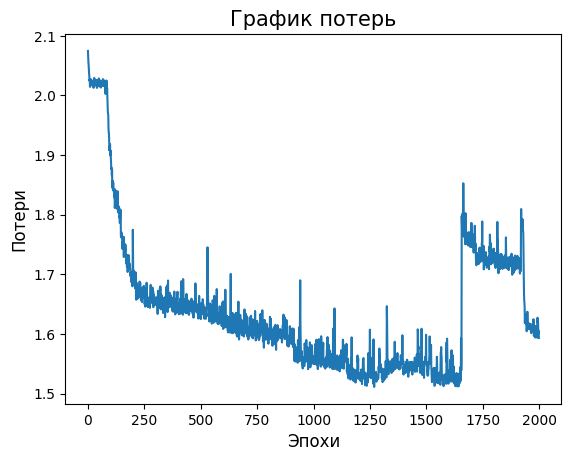

In [23]:
from matplotlib import pyplot as plt

plt.title('График потерь',fontsize=15)
plt.xlabel('Эпохи',fontsize=12)
plt.ylabel('Потери',fontsize=12)
plt.plot(loss_history_norm)

plt.show()

In [24]:
from train import test_model

y_pred_test_norm = test_model(model=best_model_norm, loader_test=test_norm, device=device)

In [25]:
import sklearn.metrics as metrics

y_true_test_norm = np.array(test_dataset_norm["label"])

result_total_norm = metrics.f1_score(y_true_test_norm, y_pred_test_norm, average='micro')
class_results_norm = metrics.f1_score(y_true_test_norm, y_pred_test_norm, average=None)


print("Оценка качества F1 (общая):", result_total_norm)
print()
print("Оценка качества F1 по классам:")
print("Оценка качества F1 (0):", class_results_norm[0])
print("Оценка качества F1 (1):", class_results_norm[1])
print("Оценка качества F1 (2):", class_results_norm[2])
print("Оценка качества F1 (3):", class_results_norm[3])
print("Оценка качества F1 (4):", class_results_norm[4])
print("Оценка качества F1 (5):", class_results_norm[5])
print("Оценка качества F1 (6):", class_results_norm[6])
print("Оценка качества F1 (7):", class_results_norm[7])

Оценка качества F1 (общая): 0.6836734693877551

Оценка качества F1 по классам:
Оценка качества F1 (0): 0.6842105263157895
Оценка качества F1 (1): 0.5882352941176471
Оценка качества F1 (2): 0.0
Оценка качества F1 (3): 0.4444444444444445
Оценка качества F1 (4): 0.9600000000000001
Оценка качества F1 (5): 0.0
Оценка качества F1 (6): 0.8695652173913043
Оценка качества F1 (7): 0.819672131147541


In [26]:
net_diff = model.CNN(COUNT_IN_CHANNEL, NUM_CLASSES).to(device)

loss_history_diff, best_model_diff = train_model(train_diff, valid_diff, net_diff, epochs=2000, device=device)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch [0/2000], loss = 2.0751 acc_val = 0.1327
Epoch [1/2000], loss = 2.0670 acc_val = 0.1327
Epoch [2/2000], loss = 2.0592 acc_val = 0.1327
Epoch [3/2000], loss = 2.0524 acc_val = 0.1327
Epoch [4/2000], loss = 2.0402 acc_val = 0.1327
Epoch [5/2000], loss = 2.0436 acc_val = 0.1327
Epoch [6/2000], loss = 2.0379 acc_val = 0.2449
Epoch [7/2000], loss = 2.0293 acc_val = 0.2449
Epoch [8/2000], loss = 2.0283 acc_val = 0.2449
Epoch [9/2000], loss = 2.0260 acc_val = 0.2449
Epoch [10/2000], loss = 2.0195 acc_val = 0.2449
Epoch [11/2000], loss = 2.0248 acc_val = 0.2449
Epoch [12/2000], loss = 2.0274 acc_val = 0.2449
Epoch [13/2000], loss = 2.0237 acc_val = 0.2449
Epoch [14/2000], loss = 2.0267 acc_val = 0.2449
Epoch [15/2000], loss = 2.0174 acc_val = 0.2449
Epoch [16/2000], loss = 2.0265 acc_val = 0.2449
Epoch [17/2000], loss = 2.0200 acc_val = 0.2449
Epoch [18/2000], loss = 2.0197 acc_val = 0.2449
Epoch [19/2000], loss = 2.0161 acc_val = 0.2449
Epoch [20/2000], loss = 2.0217 acc_val = 0.2449
Ep

Epoch [171/2000], loss = 1.7034 acc_val = 0.5714
Epoch [172/2000], loss = 1.7099 acc_val = 0.6020
Epoch [173/2000], loss = 1.7036 acc_val = 0.5714
Epoch [174/2000], loss = 1.6878 acc_val = 0.6122
Epoch [175/2000], loss = 1.6926 acc_val = 0.6020
Epoch [176/2000], loss = 1.6852 acc_val = 0.5918
Epoch [177/2000], loss = 1.6936 acc_val = 0.6224
Epoch [178/2000], loss = 1.6908 acc_val = 0.6122
Epoch [179/2000], loss = 1.6921 acc_val = 0.6122
Epoch [180/2000], loss = 1.6854 acc_val = 0.6224
Epoch [181/2000], loss = 1.6889 acc_val = 0.6122
Epoch [182/2000], loss = 1.6914 acc_val = 0.6122
Epoch [183/2000], loss = 1.6961 acc_val = 0.5918
Epoch [184/2000], loss = 1.6738 acc_val = 0.6224
Epoch [185/2000], loss = 1.6662 acc_val = 0.6327
Epoch [186/2000], loss = 1.6769 acc_val = 0.6122
Epoch [187/2000], loss = 1.6818 acc_val = 0.6020
Epoch [188/2000], loss = 1.6632 acc_val = 0.6224
Epoch [189/2000], loss = 1.6806 acc_val = 0.6020
Epoch [190/2000], loss = 1.7014 acc_val = 0.6224
Epoch [191/2000], lo

Epoch [339/2000], loss = 1.6426 acc_val = 0.6122
Epoch [340/2000], loss = 1.6472 acc_val = 0.6224
Epoch [341/2000], loss = 1.6543 acc_val = 0.6122
Epoch [342/2000], loss = 1.6508 acc_val = 0.6224
Epoch [343/2000], loss = 1.6568 acc_val = 0.6429
Epoch [344/2000], loss = 1.6460 acc_val = 0.6429
Epoch [345/2000], loss = 1.6460 acc_val = 0.6224
Epoch [346/2000], loss = 1.6473 acc_val = 0.6122
Epoch [347/2000], loss = 1.6433 acc_val = 0.6122
Epoch [348/2000], loss = 1.6586 acc_val = 0.6224
Epoch [349/2000], loss = 1.6628 acc_val = 0.6020
Epoch [350/2000], loss = 1.6701 acc_val = 0.6122
Epoch [351/2000], loss = 1.6423 acc_val = 0.6122
Epoch [352/2000], loss = 1.6559 acc_val = 0.6122
Epoch [353/2000], loss = 1.6584 acc_val = 0.6224
Epoch [354/2000], loss = 1.6613 acc_val = 0.6224
Epoch [355/2000], loss = 1.6904 acc_val = 0.5816
Epoch [356/2000], loss = 1.6561 acc_val = 0.5816
Epoch [357/2000], loss = 1.6623 acc_val = 0.6122
Epoch [358/2000], loss = 1.6427 acc_val = 0.6122
Epoch [359/2000], lo

Epoch [507/2000], loss = 1.6210 acc_val = 0.6531
Epoch [508/2000], loss = 1.6189 acc_val = 0.6327
Epoch [509/2000], loss = 1.6322 acc_val = 0.5000
Epoch [510/2000], loss = 1.6423 acc_val = 0.6327
Epoch [511/2000], loss = 1.6289 acc_val = 0.6429
Epoch [512/2000], loss = 1.6221 acc_val = 0.6837
Epoch [513/2000], loss = 1.6073 acc_val = 0.6939
Epoch [514/2000], loss = 1.6135 acc_val = 0.6837
Epoch [515/2000], loss = 1.6197 acc_val = 0.7041
Epoch [516/2000], loss = 1.6271 acc_val = 0.6735
Epoch [517/2000], loss = 1.6060 acc_val = 0.6735
Epoch [518/2000], loss = 1.6172 acc_val = 0.6735
Epoch [519/2000], loss = 1.6173 acc_val = 0.6633
Epoch [520/2000], loss = 1.6245 acc_val = 0.6327
Epoch [521/2000], loss = 1.6244 acc_val = 0.6531
Epoch [522/2000], loss = 1.6232 acc_val = 0.6735
Epoch [523/2000], loss = 1.6172 acc_val = 0.6837
Epoch [524/2000], loss = 1.6163 acc_val = 0.6735
Epoch [525/2000], loss = 1.6218 acc_val = 0.7041
Epoch [526/2000], loss = 1.6099 acc_val = 0.6939
Epoch [527/2000], lo

Epoch [675/2000], loss = 1.5933 acc_val = 0.7041
Epoch [676/2000], loss = 1.5940 acc_val = 0.6735
Epoch [677/2000], loss = 1.5954 acc_val = 0.6735
Epoch [678/2000], loss = 1.5991 acc_val = 0.6735
Epoch [679/2000], loss = 1.6096 acc_val = 0.7041
Epoch [680/2000], loss = 1.5958 acc_val = 0.6837
Epoch [681/2000], loss = 1.5920 acc_val = 0.7041
Epoch [682/2000], loss = 1.5968 acc_val = 0.6837
Epoch [683/2000], loss = 1.6052 acc_val = 0.6735
Epoch [684/2000], loss = 1.6036 acc_val = 0.6735
Epoch [685/2000], loss = 1.6237 acc_val = 0.6633
Epoch [686/2000], loss = 1.6061 acc_val = 0.6735
Epoch [687/2000], loss = 1.6082 acc_val = 0.6735
Epoch [688/2000], loss = 1.6426 acc_val = 0.6939
Epoch [689/2000], loss = 1.6135 acc_val = 0.6735
Epoch [690/2000], loss = 1.6011 acc_val = 0.6633
Epoch [691/2000], loss = 1.6088 acc_val = 0.6633
Epoch [692/2000], loss = 1.6118 acc_val = 0.6837
Epoch [693/2000], loss = 1.5978 acc_val = 0.6837
Epoch [694/2000], loss = 1.6058 acc_val = 0.6939
Epoch [695/2000], lo

Epoch [843/2000], loss = 1.5946 acc_val = 0.6633
Epoch [844/2000], loss = 1.6065 acc_val = 0.6837
Epoch [845/2000], loss = 1.6489 acc_val = 0.6633
Epoch [846/2000], loss = 1.6220 acc_val = 0.6735
Epoch [847/2000], loss = 1.6054 acc_val = 0.7041
Epoch [848/2000], loss = 1.6002 acc_val = 0.6939
Epoch [849/2000], loss = 1.5993 acc_val = 0.6633
Epoch [850/2000], loss = 1.6105 acc_val = 0.6633
Epoch [851/2000], loss = 1.5992 acc_val = 0.6735
Epoch [852/2000], loss = 1.6062 acc_val = 0.6939
Epoch [853/2000], loss = 1.5895 acc_val = 0.6837
Epoch [854/2000], loss = 1.5724 acc_val = 0.6735
Epoch [855/2000], loss = 1.5873 acc_val = 0.7143
Epoch [856/2000], loss = 1.5888 acc_val = 0.6837
Epoch [857/2000], loss = 1.5960 acc_val = 0.7143
Epoch [858/2000], loss = 1.5892 acc_val = 0.6939
Epoch [859/2000], loss = 1.6167 acc_val = 0.6633
Epoch [860/2000], loss = 1.5897 acc_val = 0.7041
Epoch [861/2000], loss = 1.5900 acc_val = 0.6939
Epoch [862/2000], loss = 1.5993 acc_val = 0.7041
Epoch [863/2000], lo

Epoch [1010/2000], loss = 1.5935 acc_val = 0.7143
Epoch [1011/2000], loss = 1.5735 acc_val = 0.6837
Epoch [1012/2000], loss = 1.5951 acc_val = 0.7143
Epoch [1013/2000], loss = 1.5861 acc_val = 0.6837
Epoch [1014/2000], loss = 1.5745 acc_val = 0.7143
Epoch [1015/2000], loss = 1.6083 acc_val = 0.7143
Epoch [1016/2000], loss = 1.5932 acc_val = 0.7041
Epoch [1017/2000], loss = 1.5835 acc_val = 0.7143
Epoch [1018/2000], loss = 1.5776 acc_val = 0.7041
Epoch [1019/2000], loss = 1.5763 acc_val = 0.7143
Epoch [1020/2000], loss = 1.5862 acc_val = 0.6837
Epoch [1021/2000], loss = 1.6044 acc_val = 0.7041
Epoch [1022/2000], loss = 1.5911 acc_val = 0.7041
Epoch [1023/2000], loss = 1.5820 acc_val = 0.6633
Epoch [1024/2000], loss = 1.6200 acc_val = 0.6633
Epoch [1025/2000], loss = 1.5940 acc_val = 0.7041
Epoch [1026/2000], loss = 1.5981 acc_val = 0.6837
Epoch [1027/2000], loss = 1.5838 acc_val = 0.6837
Epoch [1028/2000], loss = 1.5822 acc_val = 0.6735
Epoch [1029/2000], loss = 1.6118 acc_val = 0.6939


Epoch [1176/2000], loss = 1.5665 acc_val = 0.7449
Epoch [1177/2000], loss = 1.5683 acc_val = 0.7143
Epoch [1178/2000], loss = 1.5762 acc_val = 0.7347
Epoch [1179/2000], loss = 1.5673 acc_val = 0.6939
Epoch [1180/2000], loss = 1.5952 acc_val = 0.6429
Epoch [1181/2000], loss = 1.6212 acc_val = 0.7347
Epoch [1182/2000], loss = 1.5832 acc_val = 0.7041
Epoch [1183/2000], loss = 1.5821 acc_val = 0.7245
Epoch [1184/2000], loss = 1.6178 acc_val = 0.7347
Epoch [1185/2000], loss = 1.5830 acc_val = 0.7347
Epoch [1186/2000], loss = 1.5816 acc_val = 0.7143
Epoch [1187/2000], loss = 1.5630 acc_val = 0.7449
Epoch [1188/2000], loss = 1.5703 acc_val = 0.7041
Epoch [1189/2000], loss = 1.5693 acc_val = 0.7347
Epoch [1190/2000], loss = 1.5752 acc_val = 0.7041
Epoch [1191/2000], loss = 1.5716 acc_val = 0.7245
Epoch [1192/2000], loss = 1.5925 acc_val = 0.7347
Epoch [1193/2000], loss = 1.5637 acc_val = 0.7347
Epoch [1194/2000], loss = 1.5700 acc_val = 0.7449
Epoch [1195/2000], loss = 1.5665 acc_val = 0.7041


Epoch [1340/2000], loss = 1.5598 acc_val = 0.7449
Epoch [1341/2000], loss = 1.5680 acc_val = 0.7245
Epoch [1342/2000], loss = 1.5668 acc_val = 0.7143
Epoch [1343/2000], loss = 1.5747 acc_val = 0.7143
Epoch [1344/2000], loss = 1.5626 acc_val = 0.7347
Epoch [1345/2000], loss = 1.5731 acc_val = 0.7143
Epoch [1346/2000], loss = 1.5651 acc_val = 0.7347
Epoch [1347/2000], loss = 1.5632 acc_val = 0.7449
Epoch [1348/2000], loss = 1.5686 acc_val = 0.7143
Epoch [1349/2000], loss = 1.5732 acc_val = 0.7347
Epoch [1350/2000], loss = 1.5724 acc_val = 0.7143
Epoch [1351/2000], loss = 1.5697 acc_val = 0.7449
Epoch [1352/2000], loss = 1.5750 acc_val = 0.7347
Epoch [1353/2000], loss = 1.5887 acc_val = 0.7347
Epoch [1354/2000], loss = 1.5850 acc_val = 0.7041
Epoch [1355/2000], loss = 1.5908 acc_val = 0.7347
Epoch [1356/2000], loss = 1.6135 acc_val = 0.6939
Epoch [1357/2000], loss = 1.6009 acc_val = 0.7143
Epoch [1358/2000], loss = 1.5581 acc_val = 0.7347
Epoch [1359/2000], loss = 1.5660 acc_val = 0.7245


Epoch [1504/2000], loss = 1.5586 acc_val = 0.7347
Epoch [1505/2000], loss = 1.5686 acc_val = 0.7245
Epoch [1506/2000], loss = 1.5868 acc_val = 0.7245
Epoch [1507/2000], loss = 1.5629 acc_val = 0.7143
Epoch [1508/2000], loss = 1.5611 acc_val = 0.7143
Epoch [1509/2000], loss = 1.5673 acc_val = 0.7041
Epoch [1510/2000], loss = 1.5768 acc_val = 0.7041
Epoch [1511/2000], loss = 1.5695 acc_val = 0.6633
Epoch [1512/2000], loss = 1.5611 acc_val = 0.7245
Epoch [1513/2000], loss = 1.5724 acc_val = 0.7245
Epoch [1514/2000], loss = 1.5643 acc_val = 0.7449
Epoch [1515/2000], loss = 1.5708 acc_val = 0.7143
Epoch [1516/2000], loss = 1.5674 acc_val = 0.7449
Epoch [1517/2000], loss = 1.5549 acc_val = 0.7347
Epoch [1518/2000], loss = 1.5750 acc_val = 0.7347
Epoch [1519/2000], loss = 1.5538 acc_val = 0.7449
Epoch [1520/2000], loss = 1.5582 acc_val = 0.7449
Epoch [1521/2000], loss = 1.5612 acc_val = 0.7449
Epoch [1522/2000], loss = 1.5654 acc_val = 0.7449
Epoch [1523/2000], loss = 1.5739 acc_val = 0.7449


Epoch [1669/2000], loss = 1.6309 acc_val = 0.6429
Epoch [1670/2000], loss = 1.6477 acc_val = 0.6939
Epoch [1671/2000], loss = 1.5963 acc_val = 0.7143
Epoch [1672/2000], loss = 1.5692 acc_val = 0.7347
Epoch [1673/2000], loss = 1.5674 acc_val = 0.7245
Epoch [1674/2000], loss = 1.5550 acc_val = 0.7449
Epoch [1675/2000], loss = 1.5701 acc_val = 0.7449
Epoch [1676/2000], loss = 1.5711 acc_val = 0.7347
Epoch [1677/2000], loss = 1.5601 acc_val = 0.7245
Epoch [1678/2000], loss = 1.5552 acc_val = 0.7143
Epoch [1679/2000], loss = 1.5525 acc_val = 0.7449
Epoch [1680/2000], loss = 1.5727 acc_val = 0.7143
Epoch [1681/2000], loss = 1.5687 acc_val = 0.7347
Epoch [1682/2000], loss = 1.5661 acc_val = 0.7449
Epoch [1683/2000], loss = 1.5648 acc_val = 0.7347
Epoch [1684/2000], loss = 1.5547 acc_val = 0.7449
Epoch [1685/2000], loss = 1.5744 acc_val = 0.7449
Epoch [1686/2000], loss = 1.5612 acc_val = 0.7449
Epoch [1687/2000], loss = 1.5563 acc_val = 0.7449
Epoch [1688/2000], loss = 1.5706 acc_val = 0.7449


Epoch [1834/2000], loss = 1.5808 acc_val = 0.7755
Epoch [1835/2000], loss = 1.5594 acc_val = 0.7143
Epoch [1836/2000], loss = 1.5722 acc_val = 0.7755
Epoch [1837/2000], loss = 1.5520 acc_val = 0.7449
Epoch [1838/2000], loss = 1.5623 acc_val = 0.6939
Epoch [1839/2000], loss = 1.5696 acc_val = 0.7347
Epoch [1840/2000], loss = 1.5572 acc_val = 0.7347
Epoch [1841/2000], loss = 1.5591 acc_val = 0.7041
Epoch [1842/2000], loss = 1.5413 acc_val = 0.7347
Epoch [1843/2000], loss = 1.5489 acc_val = 0.7755
Epoch [1844/2000], loss = 1.5649 acc_val = 0.7347
Epoch [1845/2000], loss = 1.5548 acc_val = 0.7449
Epoch [1846/2000], loss = 1.5517 acc_val = 0.7755
Epoch [1847/2000], loss = 1.5436 acc_val = 0.7857
Epoch [1848/2000], loss = 1.5355 acc_val = 0.7653
Epoch [1849/2000], loss = 1.5528 acc_val = 0.7143
Epoch [1850/2000], loss = 1.5595 acc_val = 0.6735
Epoch [1851/2000], loss = 1.6107 acc_val = 0.7347
Epoch [1852/2000], loss = 1.5413 acc_val = 0.7245
Epoch [1853/2000], loss = 1.5630 acc_val = 0.7449


Epoch [1998/2000], loss = 1.5253 acc_val = 0.7857
Epoch [1999/2000], loss = 1.5271 acc_val = 0.7041


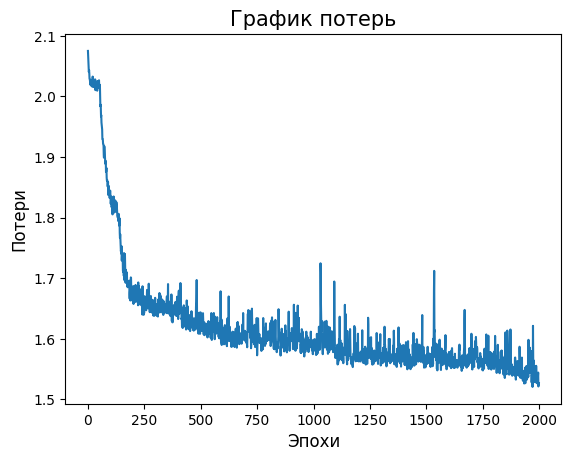

In [27]:
plt.title('График потерь',fontsize=15)
plt.xlabel('Эпохи',fontsize=12)
plt.ylabel('Потери',fontsize=12)
plt.plot(loss_history_diff)

plt.show()

In [28]:
y_pred_test_diff = test_model(model=best_model_diff, loader_test=test_diff, device=device)
y_true_test_diff = np.array(test_dataset_diff["label"])

result_total_diff = metrics.f1_score(y_true_test_diff, y_pred_test_diff, average='micro')
class_results_diff = metrics.f1_score(y_true_test_diff, y_pred_test_diff, average=None)


print("Оценка качества F1 (общая):", result_total_diff)
print()
print("Оценка качества F1 по классам:")
print("Оценка качества F1 (0):", class_results_diff[0])
print("Оценка качества F1 (1):", class_results_diff[1])
print("Оценка качества F1 (2):", class_results_diff[2])
print("Оценка качества F1 (3):", class_results_diff[3])
print("Оценка качества F1 (4):", class_results_diff[4])
print("Оценка качества F1 (5):", class_results_diff[5])
print("Оценка качества F1 (6):", class_results_diff[6])
print("Оценка качества F1 (7):", class_results_diff[7])

Оценка качества F1 (общая): 0.7244897959183674

Оценка качества F1 по классам:
Оценка качества F1 (0): 0.5454545454545455
Оценка качества F1 (1): 0.6666666666666666
Оценка качества F1 (2): 0.9411764705882353
Оценка качества F1 (3): 0.6
Оценка качества F1 (4): 0.8799999999999999
Оценка качества F1 (5): 0.6666666666666666
Оценка качества F1 (6): 0.4
Оценка качества F1 (7): 0.8333333333333333
